## White House Salary Comparison

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from gender import gender
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 9)

`white_house_salaries_gendered` contains the 2016 and 2017 salaries and names of White House Employees from the White House Reports from each year


In [30]:
df = pd.read_csv('white_house_salaries_gendered.csv', encoding='latin1' )

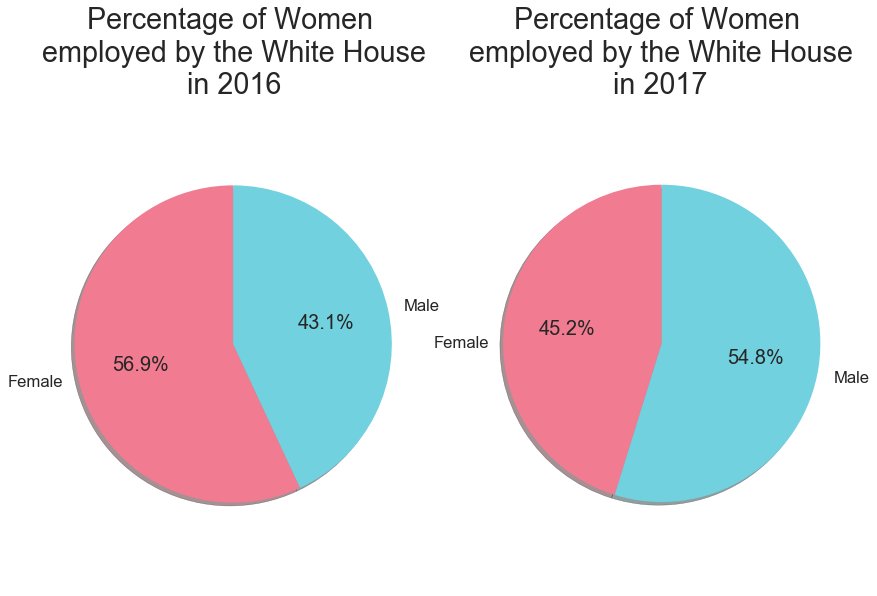

In [68]:
fem_2016 = df[(df['gender'] == 'female') & (df['year'] == 2016)].count()[0]
mal_2016 = df[(df['gender'] == 'male') & (df['year'] == 2016)].count()[0]

fem_2017 = df[(df['gender'] == 'female') & (df['year'] == 2017)].count()[0]
mal_2017 = df[(df['gender'] == 'male') & (df['year'] == 2017)].count()[0]

plt.rcParams['font.size'] = 20.0

plt.subplot(1,2,1)
plt.title("Percentage of Women \nemployed by the White House\nin 2016")
labels = 'Female', 'Male'
sizes = [fem_2016, mal_2016]
colors = ['#F17B91', '#71D1DF']

patches, texts, autotexts = plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
for t in texts:
    t.set_size('smaller')
plt.axis('equal')



plt.subplot(1,2,2)
plt.title("Percentage of Women \nemployed by the White House\nin 2017")
labels = '\n\n\nFemale', '\nMale'
sizes = [fem_2017, mal_2017]
patches, texts, autotexts = plt.pie(sizes , labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
for t in texts:
    t.set_size('smaller')
plt.axis('equal');


# First we compared numbers of women in the white house between 2016 and 2017

# In 2017, male employees are more prevalent in higher paying positions. 

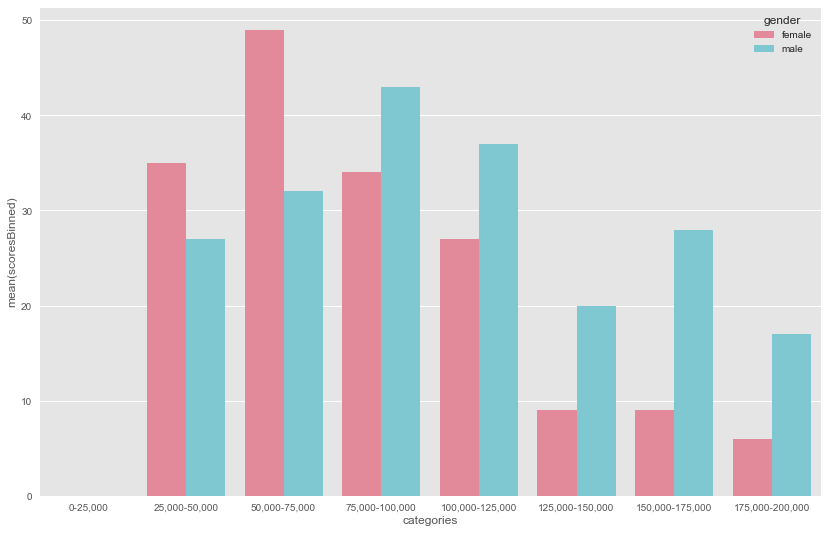

In [51]:
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
group_names = ['0-25,000', '25,000-50,000', '50,000-75,000', '75,000-100,000', '100,000-125,000', '125,000-150,000', '150,000-175,000', '175,000-200,000']

categories = pd.cut(df['Salary'], bins, labels=group_names)
df['categories'] = pd.cut(df['Salary'], bins, labels=group_names)
df['scoresBinned'] = pd.cut(df['Salary'], bins)

df_grouped = df.groupby(['categories', 'gender', 'year'], as_index=False).count()

sns.barplot(x='categories', y='scoresBinned', data=df_grouped[df_grouped['year'] == 2017], hue='gender', palette={'female' : '#F17B91', 'male' : '#71D1DF'});

# Another way of showing this distribution is through a violin plot, note that in 2016, male and female saleries had an even distriubution. In 2017, men moved to much higher salaries


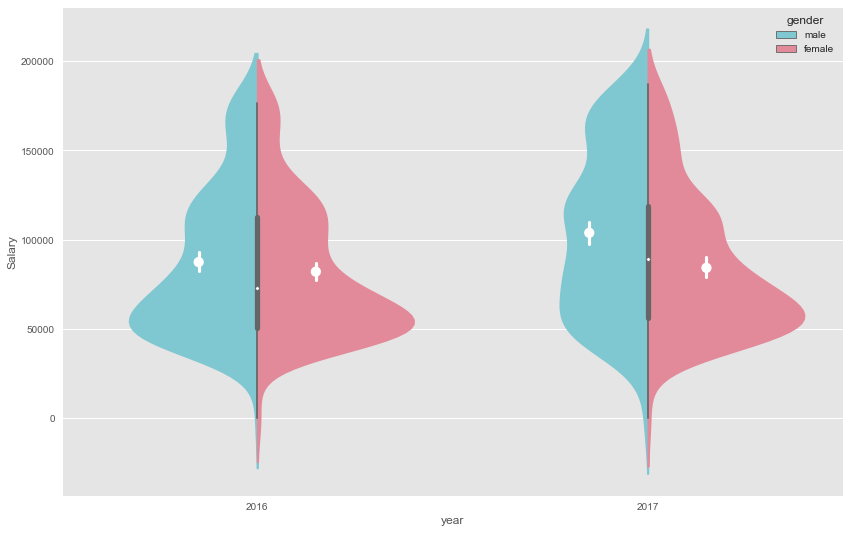

In [45]:
ax = sns.pointplot(x="year", y='Salary', hue="gender",
             data=df, dodge=0.3, join=False,  palette=['white'])
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100, label="")


sns.violinplot('year', 'Salary', split=True, hue='gender', data =df, orient="v",  palette={'female' : '#F17B91', 'male' : '#71D1DF'}); 